In [1]:
# The code was removed by Watson Studio for sharing.

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [2]:
df_data_1.sort_values(by="Very interested",ascending = False,inplace= True)
total = pd.Series(df_data_1.sum(axis=1),)

col1 = df_data_1['Very interested'].divide(total)
col2 = df_data_1['Somewhat interested'].divide(total)
col3 = df_data_1['Not interested'].divide(total)

df_perc = pd.concat([col1,col2,col3], axis = 1)
df_perc.columns = ['Very interested','Somewhat interested' , 'Not interested']
df_perc = df_perc.apply(lambda x: round(100*x,2))
labels = list(df_perc.index)
df_perc

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


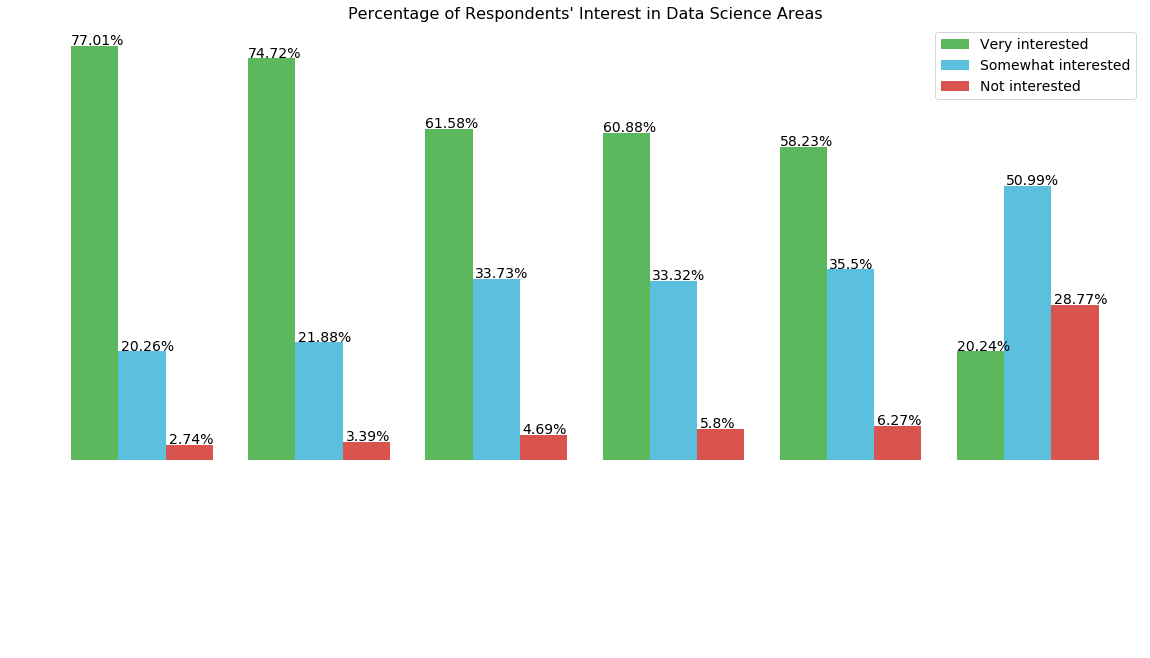

In [12]:
ax = df_perc.plot(kind='bar',
                  figsize=(20,8),
                  width = 0.8,
                  colors=['#5cb85c','#5bc0de', '#d9534f'])
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", size =16)
ax.legend(loc='best', fontsize=14)
ax.set_xticklabels(labels,fontsize = 14)
ax.axis('off')

for index,value in enumerate(df_perc['Very interested']):
    label = str(value) +'%'
    plt.annotate(label,xy=(index-0.40,value+0.1), color = 'Black', size = 14)
for index,value in enumerate(df_perc['Somewhat interested']):
    label = str(value) +'%'
    plt.annotate(label,xy=(index-0.12,value+0.1), color = 'Black', size = 14)
for index,value in enumerate(df_perc['Not interested']):
    label = str(value) + '%'
    plt.annotate(label,xy=(index+0.15,value+0.2), color = 'Black', size = 14)
ax

In [4]:

body = client_6b8b4623f32545028a63d7c612fce1ab.get_object(Bucket='pythonbasics-donotdelete-pr-v3asylzacz0au2',Key='Police_Department_Incidents_-_Previous_Year__2016_.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [5]:
unique_districts = ['CENTRAL','NORTHERN','PARK','SOUTHERN','MISSION','TENDERLOIN','RICHMOND','TARAVAL','INGLESIDE','BAYVIEW']
neighborhood_total = pd.DataFrame(index = unique_districts, columns=['Count'])
for i in range(len(unique_districts)):
    total = df_data_2.loc[df_data_2['PdDistrict'] == unique_districts[i]].shape[0]
    neighborhood_total.loc[unique_districts[i],'Count'] = total
neighborhood_total.reset_index(inplace = True)
neighborhood_total.rename(columns={'index':'Neighborhood'}, inplace = True)
neighborhood_total

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [6]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt

Folium installed and imported!


In [7]:
!wget --quiet https://cocl.us/sanfran_geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [8]:
# san_geo = 'san-francisco.geojson.json' # geojson file

world_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles='Mapbox Bright')
world_map

In [ ]:
world_map.choropleth(
    geo_data=san_geo,
    data=neighborhood_total,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

world_map